<a href="https://colab.research.google.com/github/MuhammadShavaiz/Clothes-Generator/blob/main/Image_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installing dependencies

In [69]:
!pip install tensorflow matplotlib tensorflow-datasets ipywidgets
import tensorflow as tf
# Check if GPU is available
device = tf.device("/gpu:0" if tf.config.list_physical_devices('GPU') else "/cpu")

In [70]:
# Importing datasets
import tensorflow_datasets as tfds

In [71]:
# Importing matplotlib for visulalizing
from matplotlib import pyplot as plt

In [72]:
# Bring in datasource
dataset = tfds.load('fashion_mnist', split = 'train')

#VISUALIZE DATA AND BUILD DATASET

In [73]:
import numpy as np

In [74]:
# Getting data out of pipeline
dataiterator = dataset.as_numpy_iterator()

In [75]:
dataiterator.next()['image']

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 18],
        [ 77],
        [227],
        [227],
        [208],
        [210],
        [225],
        [216],
        [ 85],
        [ 32],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 61],
        [100],
        [ 97],
        [ 80],
        [ 57],
        [117],
        [227],
        [238],
        [115],
        [ 49],
        [ 78],
        [106],
        [108],
        [ 71],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 81],
        [105],
        [ 80],
        [ 69],
      

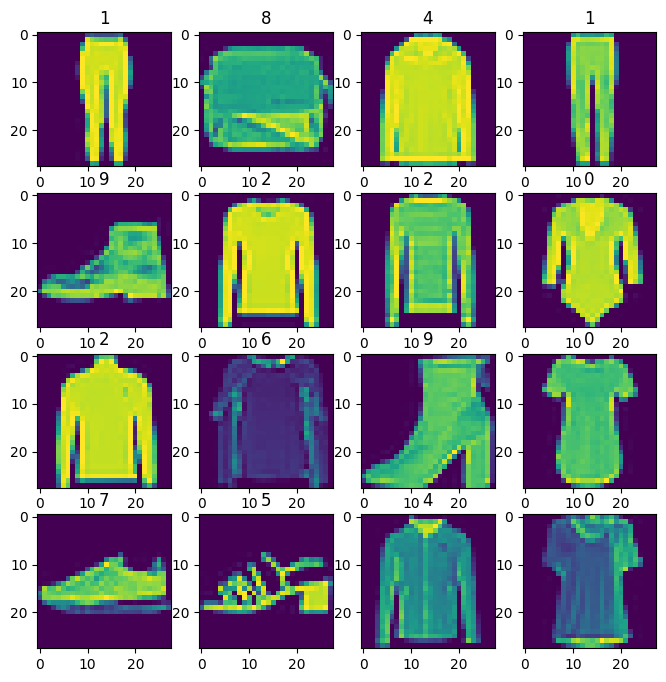

In [76]:
# Ploting the data with labels
fig, ax = plt.subplots(nrows = 4, ncols = 4, figsize = (8,8))
for row in range (4):
  for col in range (4):
    batch = dataiterator.next()
    ax[row, col].imshow(np.squeeze(batch['image']))
    ax[row, col].title.set_text(batch['label'])

In [77]:
# Scale images function
def scale_images(data):
  image = data['image']
  return image/255

In [78]:
# Applying transformations(mapping, caching, shuffling, batching, prefetching)
dataset = dataset.map(scale_images)
dataset = dataset.cache()
dataset = dataset.shuffle(60000)
dataset = dataset.batch(128)
dataset = dataset.prefetch(64)

#BUILD NEURAL NETWORK

In [79]:
# Import Modelling Components
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

In [80]:
# Build Generator
def build_generator():
    model = Sequential()

    model.add(Dense(7*7*128, input_dim = 128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7,7,128)))

    model.add(UpSampling2D())
    model.add(Conv2D(128,5, padding ='same'))
    model.add(LeakyReLU(0.2))

    model.add(UpSampling2D())
    model.add(Conv2D(128,5, padding ='same'))
    model.add(LeakyReLU(0.2))

    model.add(Conv2D(128,4,padding = 'same'))
    model.add(LeakyReLU(0.2))

    model.add(Conv2D(128,4,padding = 'same'))
    model.add(LeakyReLU(0.2))

    model.add(Conv2D(1,4, padding = 'same', activation = 'sigmoid'))

    return model

In [81]:
generator = build_generator()

In [82]:
generator.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 6272)              809088    
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 6272)              0         
                                                                 
 reshape_1 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d_2 (UpSamplin  (None, 14, 14, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                      

In [91]:
# generating new images
img = generator.predict(np.random.randn(4,128,1))

1/1 [==============================] - 0s 19ms/step


In [85]:
img.shape

(4, 28, 28, 1)

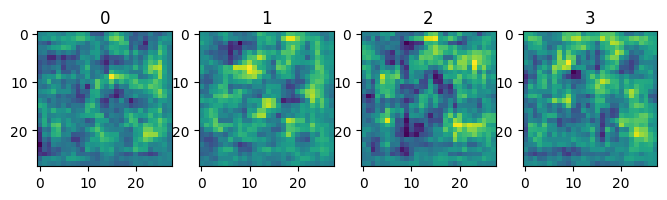

In [86]:
# plotting new images
fig, ax = plt.subplots(ncols = 4, figsize = (8,8))
for idx, img in enumerate(img):
    ax[idx].imshow(np.squeeze(img))
    ax[idx].title.set_text(idx)

In [87]:
def build_discriminator():
  model = Sequential()
  #1 conv block
  model.add(Conv2D(32, 5, input_shape = (28,28,1)))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))
  #2 conv block
  model.add(Conv2D(64 , 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))
  #3 conv block
  model.add(Conv2D(128, 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))
  #4 conv block
  model.add(Conv2D(256, 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  #flatten, passes to dense layer
  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1, activation = "sigmoid"))


  return model

In [88]:
discriminator = build_discriminator()

In [89]:
discriminator.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_14 (LeakyReLU)  (None, 24, 24, 32)        0         
                                                                 
 dropout_5 (Dropout)         (None, 24, 24, 32)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 20, 20, 64)        0         
                                                                 
 dropout_6 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 16, 16, 128)      

In [90]:
img.shape

(28, 28, 1)

In [92]:
discriminator.predict(img)

1/1 [==============================] - 0s 73ms/step


array([[0.49551037],
       [0.49549702],
       [0.49561587],
       [0.49535832]], dtype=float32)

#CONSTRUCTING TRAINING LOOP


In [134]:
#setup losses and optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
gen_opt = Adam(learning_rate = 0.0001)
dis_opt = Adam(learning_rate = 0.00001)
gen_loss = BinaryCrossentropy()
dis_loss = BinaryCrossentropy()

In [135]:
#importing base model class to sub class
from tensorflow.keras.models import Model

In [153]:
tf.random.normal((6,128,1))

<tf.Tensor: shape=(6, 128, 1), dtype=float32, numpy=
array([[[ 1.48220152e-01],
        [ 1.36771452e+00],
        [-1.12168741e+00],
        [ 7.23292887e-01],
        [-1.11638892e+00],
        [-1.26992956e-01],
        [-1.76049149e+00],
        [-2.79751092e-01],
        [-1.72932390e-02],
        [ 9.96271193e-01],
        [ 2.17573404e-01],
        [-7.00360358e-01],
        [ 1.67801011e+00],
        [-1.05419385e+00],
        [-5.87654412e-01],
        [-3.05330157e-01],
        [-1.63719915e-02],
        [-2.23518324e+00],
        [-5.83905816e-01],
        [-1.76659715e+00],
        [-5.31691432e-01],
        [-7.70599067e-01],
        [-4.91208673e-01],
        [-1.43971145e+00],
        [-9.93519664e-01],
        [ 1.23513317e+00],
        [ 5.14750242e-01],
        [-1.32548535e+00],
        [-1.57918644e+00],
        [-5.11696577e-01],
        [ 8.50174367e-01],
        [ 8.02134454e-01],
        [ 1.38437539e-01],
        [ 9.22743738e-01],
        [-3.61883044e-01],
  

In [172]:
class FashionGAN(Model):
    def __init__(self, generator, discriminator, *args, **kwargs):
        # Pass through args and kwargs to base class
        super().__init__(*args, **kwargs)

        # Create attributes for gen and disc
        self.generator = generator
        self.discriminator = discriminator

    def compile(self, gen_opt, dis_opt, gen_loss, dis_loss, *args, **kwargs):
        # Compile with base class
        super().compile(*args, **kwargs)

        # Create attributes for losses and optimizers
        self.gen_opt = gen_opt
        self.dis_opt = dis_opt
        self.gen_loss = gen_loss
        self.dis_loss = dis_loss

    def train_step(self, batch):
        # Get the data
        real_images = batch
        fake_images = self.generator(tf.random.normal((128, 128, 1)), training=False)

        # Train the discriminator
        with tf.GradientTape() as d_tape:
            # Pass the real and fake images to the discriminator model
            yhat_real = self.discriminator(real_images, training=True)
            yhat_fake = self.discriminator(fake_images, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)

            # Create labels for real and fakes images
            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)

            # Add some noise to the TRUE outputs
            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)

            # Calculate loss - BINARYCROSS
            total_d_loss = self.dis_loss(y_realfake, yhat_realfake)

        # Apply backpropagation - nn learn
        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
        self.dis_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))

        # Train the generator
        with tf.GradientTape() as g_tape:
            # Generate some new images
            gen_images = self.generator(tf.random.normal((128,128,1)), training=True)

            # Create the predicted labels
            predicted_labels = self.discriminator(gen_images, training=False)

            # Calculate loss - trick to training to fake out the discriminator
            total_g_loss = self.gen_loss(tf.zeros_like(predicted_labels), predicted_labels)

        # Apply backprop
        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.gen_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))

        return {"d_loss":total_d_loss, "g_loss":total_g_loss}

In [173]:
#instance of fashion gan class
fashgan = FashionGAN(generator, discriminator)

In [174]:
#model compile
fashgan.compile(gen_opt, dis_opt, gen_loss, dis_loss)

In [161]:
#build call back
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [178]:
class ModelMonitor(Callback):
  def __init__(self, num_img = 3, latent_dim = 128):
    self.num_img = num_img
    self.latent_dim = latent_dim

  def on_epoch_end(self, epoch, logs = None):
    random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim, 1))
    generated_images = self.model.generator(random_latent_vectors)
    generated_images *= 255
    generated_images.numpy()
    for i in range(self.num_img):
      img = array_to_img(generated_images[1])
      img.save(os.path.join('images', f'generated_img_{epoch}_{i}.png'))



In [154]:
dataset.as_numpy_iterator().next()

array([[[[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.  

In [ ]:
#TRAIN
#recommended 2000 epochs
hist = fashgan.fit(dataset, epochs = 20, callbacks = [ModelMonitor()])

Epoch 1/20
  6/469 [..............................] - ETA: 1:16 - d_loss: 0.6999 - g_loss: 0.6716

469/469 [==============================] - 82s 174ms/step - d_loss: 0.6917 - g_loss: 0.6708
Epoch 2/20
469/469 [==============================] - 81s 173ms/step - d_loss: 0.6917 - g_loss: 0.6692
Epoch 3/20
469/469 [==============================] - 81s 173ms/step - d_loss: 0.6918 - g_loss: 0.6611
Epoch 4/20
469/469 [==============================] - 81s 173ms/step - d_loss: 0.6961 - g_loss: 0.6617
Epoch 5/20
469/469 [==============================] - 81s 172ms/step - d_loss: 0.6943 - g_loss: 0.6590
Epoch 6/20
469/469 [==============================] - 80s 171ms/step - d_loss: 0.6001 - g_loss: 1.5570
Epoch 7/20
469/469 [==============================] - 81s 172ms/step - d_loss: 0.6104 - g_loss: 0.4705
Epoch 8/20
 44/469 [=>............................] - ETA: 1:13 - d_loss: 0.7448 - g_loss: 0.4336